<a href="https://colab.research.google.com/github/KhanhPham2411/How-to-Predict-Stock-Prices-Easily-Demo/blob/master/stockdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip How-to-Predict-Stock-Prices-Easily-Demo-master.zip

Archive:  How-to-Predict-Stock-Prices-Easily-Demo-master.zip
62f8b47e93d1928d7f51125a3d8221102835d23c
   creating: How-to-Predict-Stock-Prices-Easily-Demo-master/
  inflating: How-to-Predict-Stock-Prices-Easily-Demo-master/README.md  
  inflating: How-to-Predict-Stock-Prices-Easily-Demo-master/lstm.py  
  inflating: How-to-Predict-Stock-Prices-Easily-Demo-master/sp500.csv  
  inflating: How-to-Predict-Stock-Prices-Easily-Demo-master/stockdemo.ipynb  


In [3]:
cd How-to-Predict-Stock-Prices-Easily-Demo-master

/content/How-to-Predict-Stock-Prices-Easily-Demo-master


In [5]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [0]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [8]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.017692089080810547


In [9]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 3s 915us/step - loss: 0.0030 - val_loss: 0.0014


yo


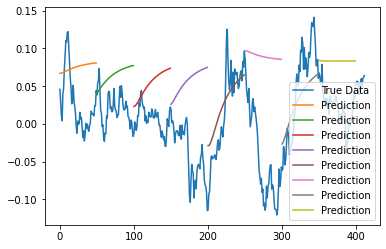

In [10]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)